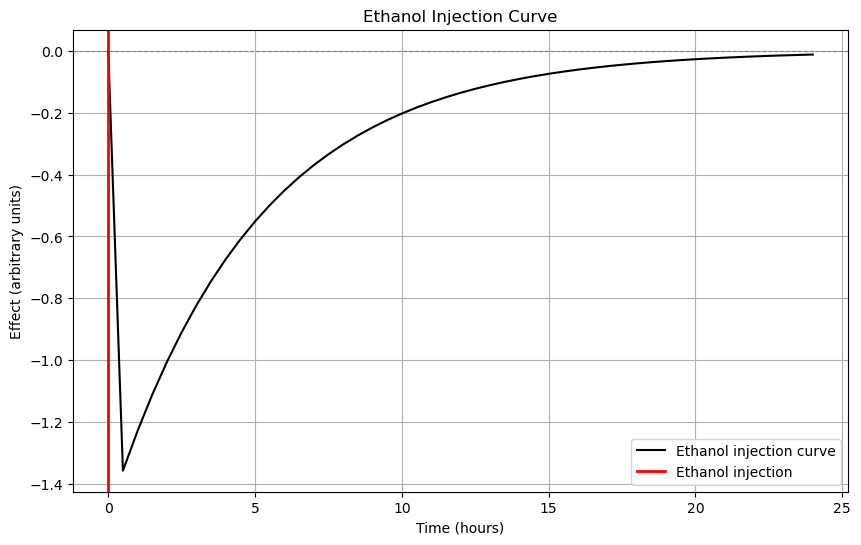

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the function
time_span = 24  # Total hours
time_step = 0.5  # 30-minute increments
time_points = np.arange(0, time_span + time_step, time_step)  # Time array

# Define the curve function
def ethanol_curve(t, drop=-1.5, recovery_rate=0.2):
    if t <= 0:
        return 0
    return drop * np.exp(-recovery_rate * t)  # Exponential recovery to 0

# Generate the curve values
curve_values = np.array([ethanol_curve(t) for t in time_points])

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(time_points, curve_values, label="Ethanol injection curve", color="black")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color="red", linestyle="-", linewidth=2, label="Ethanol injection")
plt.title("Ethanol Injection Curve")
plt.xlabel("Time (hours)")
plt.ylabel("Effect (arbitrary units)")
plt.legend()
plt.grid(True)
plt.show()

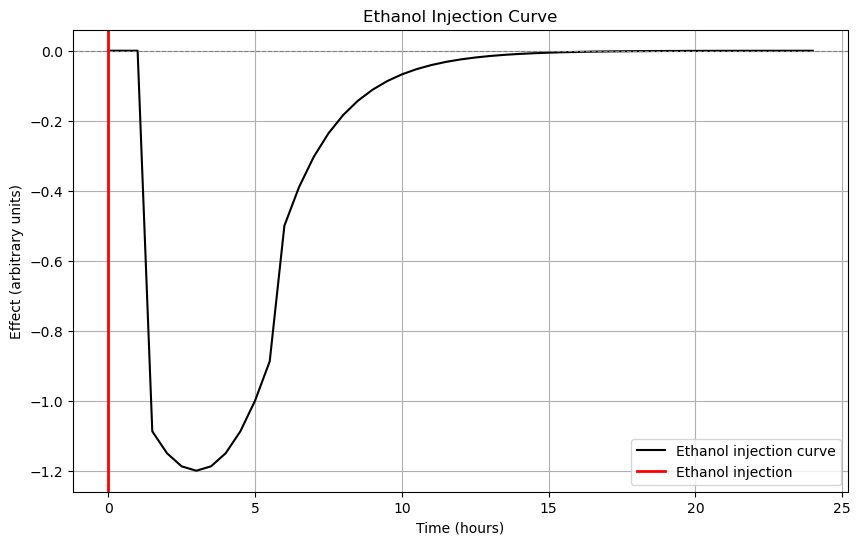

In [2]:
# XD2 

import numpy as np
import matplotlib.pyplot as plt

# Paramètres pour la fonction
time_step = 0.5  # 30 minutes
time_span = 24  # Durée totale en heures
time_points = np.arange(0, time_span + time_step, time_step)  # Points de temps (en heures)

# Définir la fonction de la courbe
def ethanol_curve(t):
    t_injection = 1
    if t <= t_injection:
        return 0
    t = t - t_injection # Ajustement du temps pour l'injection
    a = -0.3
    b = -0.05
    c = 0.5
    k = 0.5
    t_peak = 2
    t_decay = 5

    if 0 <= t < t_decay:
        return -b * (t - t_peak)**2 + a * t_peak**2
    else:
        return -c * np.exp(-k * (t - t_decay))


# Générer les valeurs de la courbe
curve_values = np.array([ethanol_curve(t) for t in time_points])

# Tracer la courbe
plt.figure(figsize=(10, 6))
plt.plot(time_points, curve_values, label="Ethanol injection curve", color="black")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color="red", linestyle="-", linewidth=2, label="Ethanol injection")
plt.title("Ethanol Injection Curve")
plt.xlabel("Time (hours)")
plt.ylabel("Effect (arbitrary units)")
plt.legend()
plt.grid(True)
plt.show()


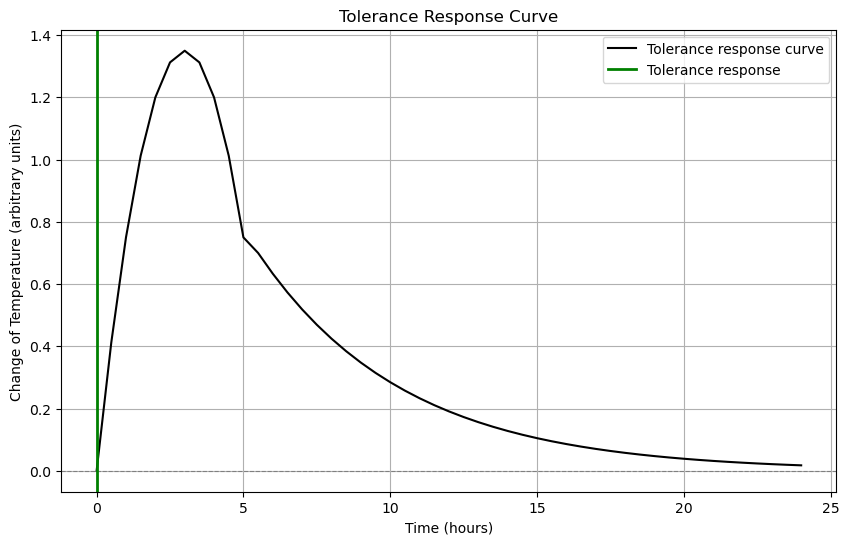

In [3]:
import numpy as np
# Parameters for the function
time_span = 24  # Total hours
time_step = 0.5  # 30-minute increments
time_points = np.arange(0, time_span + time_step, time_step)  # Time array

# Define the curve function
def tolerance_response_curve(t):
    t_start = 0
    t = t - t_start # Ajustement du temps pour l'injection
    a = 0.15
    b = 0.15
    c = -0.7
    k = 0.2
    t_peak = 3
    t_decay = 5.5

    if 0 <= t < t_decay:
        return -b * (t - t_peak)**2 + a * t_peak**2
    else:
        return -c * np.exp(-k * (t - t_decay))


# Generate the curve values
curve_values = np.array([tolerance_response_curve(t) for t in time_points])

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(time_points, curve_values, label="Tolerance response curve", color="black")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color="green", linestyle="-", linewidth=2, label="Tolerance response")
plt.title("Tolerance Response Curve")
plt.xlabel("Time (hours)")
plt.ylabel("Change of Temperature (arbitrary units)")
plt.legend()
plt.grid(True)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (49,) + inhomogeneous part.

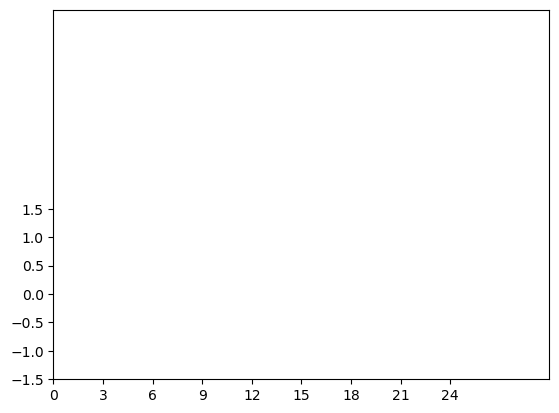

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

    
class EthanolInjection():
    def __init__(self, injection_timestep):
        self.injection_timestep = injection_timestep
    
    def ethanol_curve(self, t):
        '''
        Renvoie l'effet de l'injection (ne pas utiliser dans l'environnement).

        :param t: Temps depuis l'injection

        :return: Effet de l'injection (torch.Tensor)
        '''
        t = t - self.injection_timestep  # Adjust time for injection
        if t <= 0:
            return 0
        values = {0.0: 0, 0.5: 1.05, 1.0: 1.38, 1.5: 1.36, 2.0: 1.26, 2.5: 1.12, 3.0: 1.0, 3.5: 0.90, 4.0: 0.83, 4.5: 0.75, 5.0: 0.68, 5.5: 0.61, 6.0: 0.55, 6.5: 0.49, 7.0: 0.44, 7.5: 0.39, 8.0: 0.34, 8.5: 0.3, 9.0: 0.27, 9.5: 0.23, 10.0: 0.21, 10.5: 0.18, 11.0: 0.16, 11.5: 0.14, 12.0: 0.12, 12.5: 0.1, 13.0: 0.09, 13.5: 0.08, 14.0: 0.07, 14.5: 0.06, 15.0: 0.05, 15.5: 0.05, 16.0: 0.04, 16.5: 0.03, 17.0: 0.03, 17.5: 0.02, 18.0: 0.02, 18.5: 0.02, 19.0: 0.02, 19.5: 0.01, 20.0: 0.01, 20.5: 0.01, 21.0: 0.01, 21.5: 0.01, 22.0: 0.01, 22.5: 0.01, 23.0: 0.01, 23.5: 0.01, 24.0: 0}
        
        mean = torch.zeros(1)
        std = torch.ones(1) * 0.05
        noise = torch.normal(mean, std)
        return torch.as_tensor(-values.get(t, 0)) + noise

        
    def get_effect(self, t):
        """
        Renvoie l'effet de l'injection (à utiliser dans l'environnement).

        :param t: Timestep courant

        :return: Effet de l'injection (torch.Tensor)
        """
        return self.ethanol_curve(t - self.injection_timestep)

class ToleranceResponse():
    def __init__(self, response_timestep):
        self.response_timestep = response_timestep
    
    def tolerance_response_curve(self, t):
        """
        Renvoie les effets de la réponse de tolérance. (ne pas utiliser dans l'environnement)

        :param t: Timestep courant

        :return: Effet de la réponse de tolérance (torch.Tensor)
        """
        t = t - self.response_timestep  # Adjust time for injection
        if t <= 0:
            return 0
        values = {0.0: 0.0, 0.5: 0.3, 1.0: 0.52, 1.5: 0.69, 2.0: 0.82, 2.5: 0.91, 3.0: 0.98, 3.5: 1.04, 4.0: 1.09, 4.5: 0.99, 5.0: 0.9, 5.5: 0.81, 6.0: 0.74, 6.5: 0.67, 7.0: 0.61, 7.5: 0.55, 8.0: 0.5, 8.5: 0.45, 9.0: 0.41, 9.5: 0.37, 10.0: 0.34, 10.5: 0.31, 11.0: 0.28, 11.5: 0.25, 12.0: 0.23, 12.5: 0.21, 13.0: 0.19, 13.5: 0.17, 14.0: 0.15, 14.5: 0.14, 15.0: 0.13, 15.5: 0.12, 16.0: 0.1, 16.5: 0.09, 17.0: 0.09, 17.5: 0.08, 18.0: 0.07, 18.5: 0.06, 19.0: 0.06, 19.5: 0.05, 20.0: 0.05, 20.5: 0.04, 21.0: 0.04, 21.5: 0.04, 22.0: 0.03, 22.5: 0.03, 23.0: 0.03, 23.5: 0.02, 24.0: 0.02}
        mean = torch.zeros(1)
        std = torch.ones(1) * 0.05
        noise = torch.normal(mean, std)
        return torch.as_tensor(values.get(t, 0)) + noise

    def get_effect(self, t):
        """
        Retourne l'effet de la réponse de tolérance. (à utiliser dans l'environnement)

        :param t: Timestep courant

        :return: Effet de la réponse de tolérance (torch.Tensor)
        """
        return self.tolerance_response_curve(t - self.response_timestep)


# Parameters for simulation
time_span = 24  # Total hours
time_step = 0.5  # 30-minute increments
time_points = np.arange(0, time_span + time_step, time_step)  # Time array

# Initialize classes
ethanol_injection = EthanolInjection(injection_timestep=1)
tolerance_response = ToleranceResponse(response_timestep=0)

# Compute combined effect
combined_effect = []
for t in time_points:
    ethanol_effect = ethanol_injection.get_effect(t)
    tolerance_effect = tolerance_response.get_effect(t)
    #print(f"Time: {t:.1f} hours, Ethanol effect: {ethanol_effect:.2f}, Tolerance effect: {tolerance_effect:.2f}")
    combined_effect.append(ethanol_effect + tolerance_effect)

# Créer une figure et un axe
fig, ax = plt.subplots()
# Définir les limites des axes
ax.set_xlim(0, 30)  # Par exemple, 10 cases en x (chaque case = 3 unités)
ax.set_ylim(0, 5)   # Par exemple, 10 cases en y (chaque case = 0.5 unité)
# Définir les ticks pour que chaque case corresponde à une unité bien définie
ax.set_xticks(range(0, 27, 3))  # Ticks tous les 3 unités en x
ax.set_yticks([i * 0.5 for i in range(-3, 4)])  # Ticks tous les 0.5 unités en y

# Plot the combined effect
ax.plot(time_points, combined_effect, label="Combined effect", color="black")
# 3x = 0.5y scaling

ax.set_title("Combined Effect of Ethanol Injection and Tolerance Response")
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Effect (arbitrary units)")
ax.legend()
ax.grid(True)

In [5]:
import numpy as np

# Définir les paramètres
time_points = np.arange(0, 24.5, 0.5)  # Temps de 0 à 24 avec un pas de 0.5
peak_time = 3.5  # Moment du pic
peak_value = 1.2  # Valeur du pic

# Générer la montée avec une courbe exponentielle inversée
rise = peak_value * (1 - np.exp(-2 * time_points[time_points <= peak_time] / peak_time))

# Générer la descente après le pic avec une décroissance plus rapide
fall = peak_value * np.exp(-4 * (time_points[time_points > peak_time] - peak_time) / (24 - peak_time))

# Combiner montée et descente
values = np.concatenate([rise, fall])

# Créer le dictionnaire
result = {round(t, 1): round(v, 2) for t, v in zip(time_points, values)}

# Afficher le dictionnaire
print(result)


{0.0: 0.0, 0.5: 0.3, 1.0: 0.52, 1.5: 0.69, 2.0: 0.82, 2.5: 0.91, 3.0: 0.98, 3.5: 1.04, 4.0: 1.09, 4.5: 0.99, 5.0: 0.9, 5.5: 0.81, 6.0: 0.74, 6.5: 0.67, 7.0: 0.61, 7.5: 0.55, 8.0: 0.5, 8.5: 0.45, 9.0: 0.41, 9.5: 0.37, 10.0: 0.34, 10.5: 0.31, 11.0: 0.28, 11.5: 0.25, 12.0: 0.23, 12.5: 0.21, 13.0: 0.19, 13.5: 0.17, 14.0: 0.15, 14.5: 0.14, 15.0: 0.13, 15.5: 0.12, 16.0: 0.1, 16.5: 0.09, 17.0: 0.09, 17.5: 0.08, 18.0: 0.07, 18.5: 0.06, 19.0: 0.06, 19.5: 0.05, 20.0: 0.05, 20.5: 0.04, 21.0: 0.04, 21.5: 0.04, 22.0: 0.03, 22.5: 0.03, 23.0: 0.03, 23.5: 0.02, 24.0: 0.02}


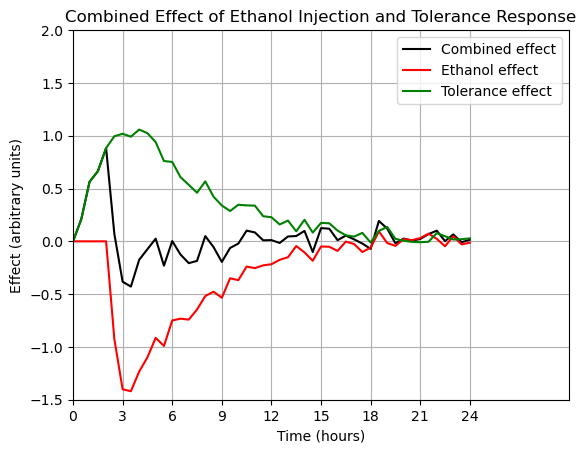

In [11]:
# Plot the individual effects
ethanol_effects = [ethanol_injection.get_effect(t) for t in time_points]
tolerance_effects = [tolerance_response.get_effect(t) for t in time_points]
combined_effect = [ethanol + tolerance for ethanol, tolerance in zip(ethanol_effects, tolerance_effects)]

# converting all tensors to float
ethanol_effects = [float(i) for i in ethanol_effects]
tolerance_effects = [float(i) for i in tolerance_effects]
combined_effect = [float(i) for i in combined_effect]


# Créer une figure et un axe
fig, ax = plt.subplots()
# Définir les limites des axes
ax.set_xlim(0, 30)  # Par exemple, 10 cases en x (chaque case = 3 unités)
ax.set_ylim(-1, 2)  # Ajusté pour inclure des effets négatifs si besoin
# Définir les ticks pour que chaque case corresponde à une unité bien définie
ax.set_xticks(range(0, 27, 3))  # Ticks tous les 3 unités en x
ax.set_yticks([i * 0.5 for i in range(-3, 5)])  # Ticks tous les 0.5 unités en y


ax.plot(time_points, combined_effect, label="Combined effect", color="black")
ax.plot(time_points, ethanol_effects, label="Ethanol effect", color="red")
ax.plot(time_points, tolerance_effects, label="Tolerance effect", color="green")

# Add titles and labels
ax.set_title("Combined Effect of Ethanol Injection and Tolerance Response")
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Effect (arbitrary units)")
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

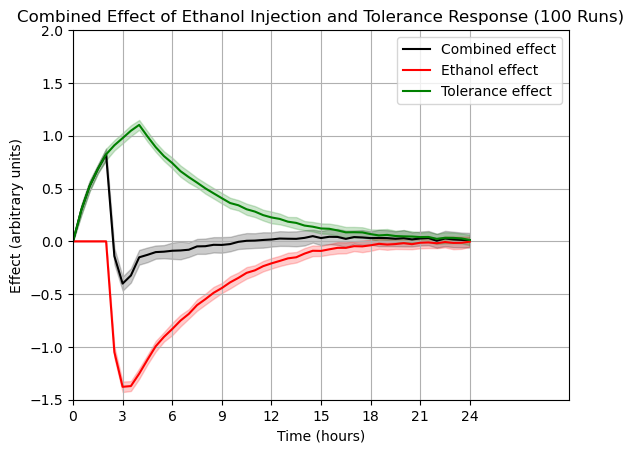

In [15]:
# Parameters
n_runs = 100  # Number of runs
time_span = 24  # Total hours
time_step = 0.5  # 30-minute increments
time_points = np.arange(0, time_span + time_step, time_step)  # Time array

# Storage for multiple runs
ethanol_runs = []
tolerance_runs = []
combined_runs = []

# Perform multiple runs
for run in range(n_runs):
    # Simulate stochastic variations in the effects (you can customize this part)
    ethanol_effects = [float(ethanol_injection.get_effect(t)) for t in time_points]
    tolerance_effects = [float(tolerance_response.get_effect(t)) for t in time_points]
    combined_effect = [ethanol + tolerance for ethanol, tolerance in zip(ethanol_effects, tolerance_effects)]

    # Store the results
    ethanol_runs.append(ethanol_effects)
    tolerance_runs.append(tolerance_effects)
    combined_runs.append(combined_effect)

# Convert to numpy arrays for easier processing
ethanol_runs = np.array(ethanol_runs)
tolerance_runs = np.array(tolerance_runs)
combined_runs = np.array(combined_runs)

# Compute mean and std for each effect
ethanol_mean = ethanol_runs.mean(axis=0)
ethanol_std = ethanol_runs.std(axis=0)

tolerance_mean = tolerance_runs.mean(axis=0)
tolerance_std = tolerance_runs.std(axis=0)

combined_mean = combined_runs.mean(axis=0)
combined_std = combined_runs.std(axis=0)

# Plot with fill_between
fig, ax = plt.subplots()
ax.set_xlim(0, 30)
ax.set_ylim(-1, 2)
ax.set_xticks(range(0, 27, 3))
ax.set_yticks([i * 0.5 for i in range(-3, 5)])

# Plot mean curves
ax.plot(time_points, combined_mean, label="Combined effect", color="black")
ax.plot(time_points, ethanol_mean, label="Ethanol effect", color="red")
ax.plot(time_points, tolerance_mean, label="Tolerance effect", color="green")

# Fill between for uncertainty
ax.fill_between(time_points, combined_mean - combined_std, combined_mean + combined_std, color="black", alpha=0.2)
ax.fill_between(time_points, ethanol_mean - ethanol_std, ethanol_mean + ethanol_std, color="red", alpha=0.2)
ax.fill_between(time_points, tolerance_mean - tolerance_std, tolerance_mean + tolerance_std, color="green", alpha=0.2)

# Add titles and labels
ax.set_title(f"Combined Effect of Ethanol Injection and Tolerance Response ({n_runs} Runs)")
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Effect (arbitrary units)")
ax.legend()
ax.grid(True)

# Show the plot
plt.show()
